- eda 를 인사이트를 정보를 토대로 추가 및 제거를 통해 데이터 정리를 정돈 합니다.


In [90]:
import pandas as pd

eda_data = pd.read_csv('./data/final_0213.csv', encoding='utf-8')

eda_data.head()

,Unnamed: 0,출연자,제목,회차,조회수,좋아요수,댓글수,재생시간(초),구독자수,term,시청률,직업,성별,나이,수상여부,인지도,에피소드,날짜
0,0,나영석,[선공개] 유퀴즈에 포위된 나영석 PD! 형이 왜 거기서 나와..?,40,881349,6186,224,314,0,1290,2.6,서비스,M,중년,Y,Y,40,2019-10-22
1,1,이명진,드라마를 위해 조셉과 거래(?) 하는 이명진PD님 |,40,173,1,1,109,0,1290,2.6,서비스,M,청년,N,N,40,2019-10-22
2,2,김부연,[#유퀴즈] 41화 레전드! ′X줄(?) 타는 스카이워크′부터 ′돌아온 의자 브레이...,41,593,4,1,394,0,1290,2.7,기타,F,중년,N,N,41,2019-10-29
3,3,김유자,[#유퀴즈] 41화 레전드! ′X줄(?) 타는 스카이워크′부터 ′돌아온 의자 브레이...,41,593,4,1,394,0,1290,2.7,기타,F,청년,N,N,41,2019-10-29
4,4,김만순,[#유퀴즈] 41화 레전드! ′X줄(?) 타는 스카이워크′부터 ′돌아온 의자 브레이...,41,593,4,1,394,0,1290,2.7,기타,F,노년,N,N,41,2019-10-29


In [91]:
eda_data.columns

Index(['Unnamed: 0', '출연자', '제목', '회차', '조회수', '좋아요수', '댓글수', '재생시간(초)',
       '구독자수', 'term', '시청률', '직업', '성별', '나이', '수상여부', '인지도', '에피소드', '날짜'],
      dtype='object')

- 제거 컬럼 : Unnamed: 0 , 제목 , 조회수 , 좋아요수 ,댓글수,재생시간(초) , term,  에피소드(중복) 

In [92]:
df_data = eda_data.drop(columns=['Unnamed: 0' , '제목' , '조회수' , '좋아요수' ,'댓글수','재생시간(초)' , 'term',  '에피소드'])

In [93]:
df_data.head()

,출연자,회차,구독자수,시청률,직업,성별,나이,수상여부,인지도,날짜
0,나영석,40,0,2.6,서비스,M,중년,Y,Y,2019-10-22
1,이명진,40,0,2.6,서비스,M,청년,N,N,2019-10-22
2,김부연,41,0,2.7,기타,F,중년,N,N,2019-10-29
3,김유자,41,0,2.7,기타,F,청년,N,N,2019-10-29
4,김만순,41,0,2.7,기타,F,노년,N,N,2019-10-29



1. 날짜 컬럼을 변경
3. 구독자 수 컬럼 쉼표 제거


In [94]:
day_data = df_data  # 날짜 컬럼 변경

day_data['날짜'] = pd.to_datetime(day_data['날짜'])
 
day_data['년'] = day_data['날짜'].dt.year
day_data['월'] = day_data['날짜'].dt.month
day_data['일'] = day_data['날짜'].dt.day

day_data=day_data.drop(columns=['날짜'])
day_data.head()


,출연자,회차,구독자수,시청률,직업,성별,나이,수상여부,인지도,년,월,일
0,나영석,40,0,2.6,서비스,M,중년,Y,Y,2019,10,22
1,이명진,40,0,2.6,서비스,M,청년,N,N,2019,10,22
2,김부연,41,0,2.7,기타,F,중년,N,N,2019,10,29
3,김유자,41,0,2.7,기타,F,청년,N,N,2019,10,29
4,김만순,41,0,2.7,기타,F,노년,N,N,2019,10,29


In [95]:
gu_data = day_data

gu_data.tail()

,출연자,회차,구독자수,시청률,직업,성별,나이,수상여부,인지도,년,월,일
830,유연수,228,"894,000",4.912,운동선수,M,청년,Y,Y,2024,1,17
831,박인비,228,"894,000",4.912,운동선수,F,청년,Y,Y,2024,1,17
832,김영옥,229,"897,000",4.468,연예인,F,노년,Y,Y,2024,1,24
833,나문희,229,"897,000",4.468,연예인,F,노년,Y,Y,2024,1,24
834,신영철,229,"897,000",4.468,사회복지,M,노년,Y,N,2024,1,24


In [96]:
#쉼표 제거
gu_data['구독자수'] = pd.to_numeric(gu_data['구독자수'].str.replace('명', '').str.replace(',', ''), errors='coerce')


gu_data.tail()


,출연자,회차,구독자수,시청률,직업,성별,나이,수상여부,인지도,년,월,일
830,유연수,228,894000,4.912,운동선수,M,청년,Y,Y,2024,1,17
831,박인비,228,894000,4.912,운동선수,F,청년,Y,Y,2024,1,17
832,김영옥,229,897000,4.468,연예인,F,노년,Y,Y,2024,1,24
833,나문희,229,897000,4.468,연예인,F,노년,Y,Y,2024,1,24
834,신영철,229,897000,4.468,사회복지,M,노년,Y,N,2024,1,24


In [97]:
df = gu_data

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   출연자     835 non-null    object 
 1   회차      835 non-null    int64  
 2   구독자수    835 non-null    int64  
 3   시청률     835 non-null    float64
 4   직업      835 non-null    object 
 5   성별      835 non-null    object 
 6   나이      835 non-null    object 
 7   수상여부    835 non-null    object 
 8   인지도     835 non-null    object 
 9   년       835 non-null    int32  
 10  월       835 non-null    int32  
 11  일       835 non-null    int32  
dtypes: float64(1), int32(3), int64(2), object(6)
memory usage: 68.6+ KB


In [99]:
df.to_csv('final_0214.csv', encoding='utf-8') # 저장

**머신러닝**

- 시청률 확인하기 위한 머신러닝


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


# 2. 범주형 변수를 원-핫 인코딩으로 변환
# 원-핫 인코더 생성
ohe = OneHotEncoder(sparse=False, drop='first')

# 원-핫 인코딩 적용할 범주형 변수 선택
categorical_cols = ['출연자', '직업', '성별', '나이', '수상여부', '인지도']

# 원-핫 인코딩 적용
categorical_data_encoded = ohe.fit_transform(df[categorical_cols])

# 원-핫 인코딩된 데이터프레임 생성
categorical_data_df = pd.DataFrame(categorical_data_encoded, columns=ohe.get_feature_names_out(categorical_cols))

# 기존 데이터프레임에서 범주형 열 제거 후, 수치형 데이터와 원-핫 인코딩된 데이터 결합
data_numeric = df.drop(columns=categorical_cols)
data_preprocessed = pd.concat([data_numeric, categorical_data_df], axis=1)

# 3. 특성과 타겟 변수 분리
X = data_preprocessed.drop(columns=['시청률'])
y = data_preprocessed['시청률']

# 4. 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


/Users/2suyeon/anaconda3/envs/ML_project/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((668, 817), (167, 817), (668,), (167,))

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 랜덤 포레스트 회귀 모델 초기화
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
rf_regressor.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = rf_regressor.predict(X_test)

# 성능 평가: RMSE(평균 제곱근 오차)와 R^2(결정 계수) 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)


rmse


0.3670343622847555

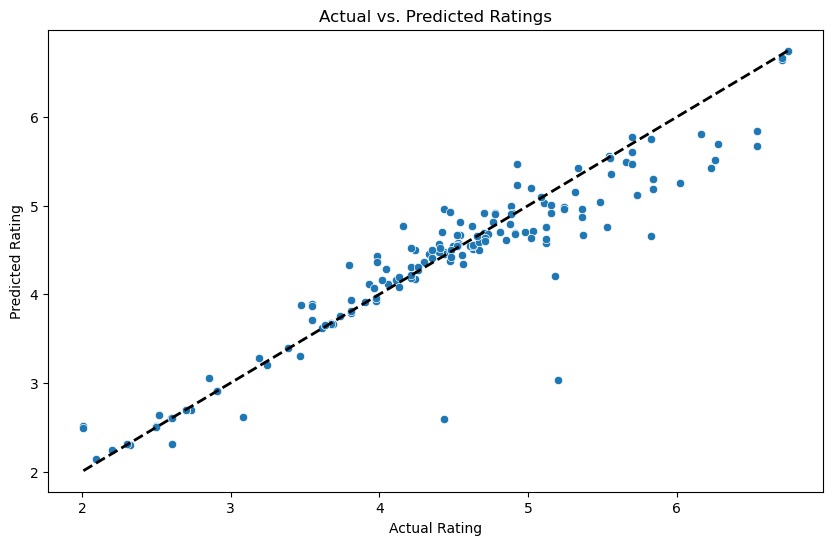

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# 실제 시청률 대 예측 시청률 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 대각선 추가
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings')

plt.show()
# 상관이 아니다.

In [103]:
import numpy as np
# 실제 값과 예측 값 사이의 절대 에러 계산
errors = np.abs(y_test - y_pred)

# 에러가 가장 큰 두 개의 데이터 포인트의 인덱스 찾기
highest_error_indices = np.argsort(errors)[-2:]

# 에러율이 높은 두 데이터 포인트 출력
# y_test가 Pandas Series인 경우 .iloc 사용, y_pred는 numpy 배열이므로 직접 인덱싱
print("높은 에러를 가진 두 데이터 포인트의 인덱스:", highest_error_indices)
print("실제 시청률:", y_test.iloc[highest_error_indices] if isinstance(y_test, pd.Series) else y_test[highest_error_indices])
print("예측 시청률:", y_pred[highest_error_indices])


높은 에러를 가진 두 데이터 포인트의 인덱스: 777    78
532    87
Name: 시청률, dtype: int64
실제 시청률: 33    4.432
72    5.200
Name: 시청률, dtype: float64
예측 시청률: [2.59776 3.03064]


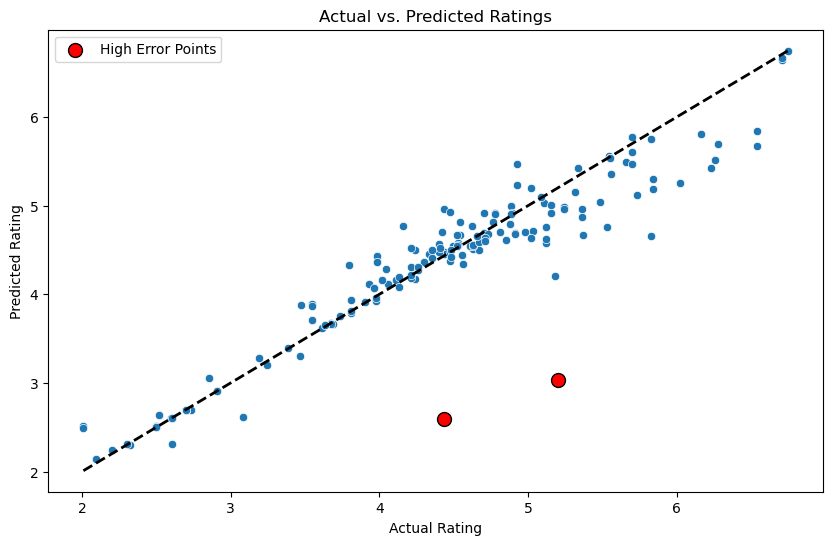

In [104]:

import numpy as np


# 기존 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 대각선 추가
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings')

# 에러 계산 및 가장 큰 에러를 가진 데이터 포인트 찾기
errors = np.abs(y_test - y_pred)
highest_error_indices = np.argsort(errors)[-2:]

# Pandas Series와 numpy 배열 처리
highest_errors_y_test = y_test.iloc[highest_error_indices] if isinstance(y_test, pd.Series) else y_test[highest_error_indices]
highest_errors_y_pred = y_pred[highest_error_indices]

# 강조할 데이터 포인트를 산점도에 추가
plt.scatter(highest_errors_y_test, highest_errors_y_pred, color='red', edgecolor='black', linewidth=1, s=100, marker='o', label='High Error Points')

# 범례 추가
plt.legend()

# 산점도 표시
plt.show()


In [105]:
# 가장 큰 에러를 가진 데이터 포인트의 에러 값 가져오기 (Pandas Series를 위해 .iloc 사용)
highest_errors_values = errors.iloc[highest_error_indices]

print("가장 큰 에러를 가진 데이터 포인트의 에러 값:", highest_errors_values.values)

# 원본 데이터셋에서 에러율이 가장 높은 데이터 포인트의 전체 행을 추출
high_error_points_full_rows = df.iloc[highest_error_indices]

# 결과 출력
print(high_error_points_full_rows)


가장 큰 에러를 가진 데이터 포인트의 에러 값: [1.83424 2.16936]
    출연자  회차   구독자수    시청률    직업 성별  나이 수상여부 인지도     년  월  일
78   백현  61      0  2.520   연예인  M  청년    N   Y  2020  7  1
87  김예지  66  20000  2.736  사회복지  F  중년    N   Y  2020  8  5


- 유튜브가 늦게 올라가면서 당시 구독자 수가 0 이였다. 그 점을 감안 했을때 백현의 구독자수가 없는 당시로 포착이 되면서 구독자 수를 이용한 관심도가 낮아 에러 포인트가 난듯 하다.
- 백현이 출연 당시 함께한 출연자들을 보면 재재, 이세돌 등이 있다.
- 김예지 는 국회의원인데. 알 수없음...

In [106]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR

rf_model = RandomForestRegressor(n_estimators=100)
gb_model = GradientBoostingRegressor(n_estimators=100)
xgb_model = xgb.XGBRFRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5)
svm_model = SVR(C=1.0, epsilon=0.1)  # You can adjust C and epsilon as needed

# 훈련
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)


rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)


In [107]:


rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)


gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)


xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)

svn_mse = mean_squared_error(y_test, svm_predictions)
svn_mae = mean_absolute_error(y_test, svm_predictions)

# Print evaluation metrics
print("\nRandom Forest - MSE:", rf_mse, "MAE:", rf_mae)
print("Gradient Boosting - MSE:", gb_mse, "MAE:", gb_mae)
print("XGBoost - MSE:", xgb_mse, "MAE:", xgb_mae)
print("SVN - MSE:", svn_mse, "MAE:", svn_mae)



Random Forest - MSE: 0.13812373798300603 MAE: 0.21413474251496986
Gradient Boosting - MSE: 0.24208440836927472 MAE: 0.35829794390674213
XGBoost - MSE: 0.279934983511718 MAE: 0.37771518187608544
SVN - MSE: 0.5312259342777209 MAE: 0.5410019903517409


- mse 와 mae 값이 낮은 모델이 좋음 r2 1에 가까워야 좋음 
#5프로의 오차를 갖는다

### 계절성 추가

In [108]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

#계절 월 별로 나누기
day_data['계절'] = day_data['월'].apply(get_season)


In [109]:
# 계절컬럼 추가
categorical_cols.append('계절')

# 계절 범주형 원핫인코딩
categorical_data_encoded = ohe.fit_transform(df[categorical_cols])

# 새로운 데이터프레임 생성
categorical_data_df = pd.DataFrame(categorical_data_encoded, columns=ohe.get_feature_names_out(categorical_cols))

# 계절 컬럼 제거
data_numeric = df.drop(columns=categorical_cols)
data_preprocessed = pd.concat([data_numeric, categorical_data_df], axis=1)


X = data_preprocessed.drop(columns=['시청률'])
y = data_preprocessed['시청률']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/Users/2suyeon/anaconda3/envs/ML_project/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 랜덤 포레스트 회귀 모델 초기화
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
rf_regressor.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = rf_regressor.predict(X_test)

# 성능 평가: RMSE(평균 제곱근 오차)와 R^2(결정 계수) 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)


rmse


0.3716756425923771

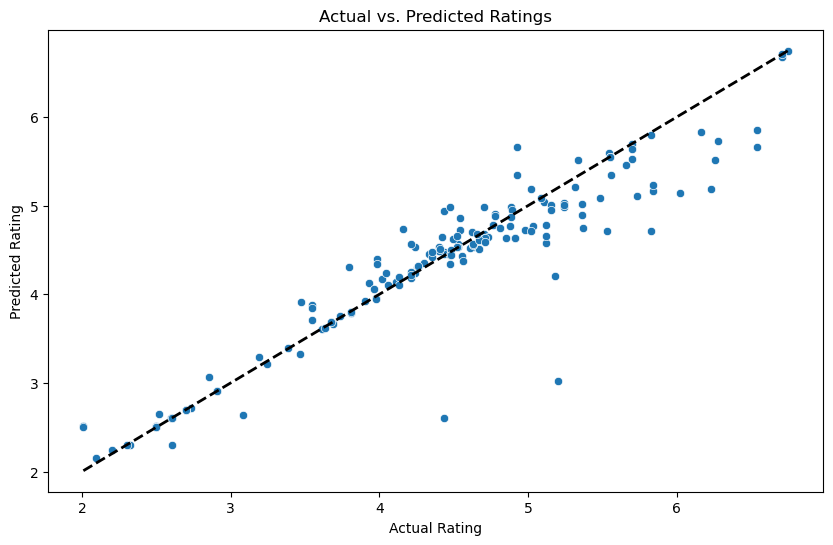

In [111]:


# 실제 시청률 대 예측 시청률 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 대각선 추가
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings')

plt.show()
# 상관이 아니다.

In [112]:

rf_model = RandomForestRegressor(n_estimators=100)
gb_model = GradientBoostingRegressor(n_estimators=100)
xgb_model = xgb.XGBRFRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5)
svm_model = SVR(C=1.0, epsilon=0.1)  


rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)


rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)


rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)


gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)


xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)

svn_mse = mean_squared_error(y_test, svm_predictions)
svn_mae = mean_absolute_error(y_test, svm_predictions)

# Print evaluation metrics
print("\nRandom Forest - MSE:", rf_mse, "MAE:", rf_mae)
print("Gradient Boosting - MSE:", gb_mse, "MAE:", gb_mae)
print("XGBoost - MSE:", xgb_mse, "MAE:", xgb_mae)
print("SVN - MSE:", svn_mse, "MAE:", svn_mae)




Random Forest - MSE: 0.1299823477453701 MAE: 0.20374889121756473
Gradient Boosting - MSE: 0.24128209620451427 MAE: 0.3570091190159396
XGBoost - MSE: 0.2759679825508021 MAE: 0.3749333500776462
SVN - MSE: 0.5312285445130208 MAE: 0.5410030642184234


## Model Performance Comparison

### 계절성 추가전

- **Random Forest**
  - MSE: 0.13727386487093346
  - MAE: 0.21216546207584844

- **Gradient Boosting**
  - MSE: 0.2419482234960412
  - MAE: 0.3580007914150416

- **XGBoost**
  - MSE: 0.279934983511718
  - MAE: 0.37771518187608544

- **SVM**
  - MSE: 0.5312259342777209
  - MAE: 0.5410019903517409

### 계절성 추가

- **Random Forest**
  - MSE: 0.13186134940397615
  - MAE: 0.20296983133732516

- **Gradient Boosting**
  - MSE: 0.2412821006605888
  - MAE: 0.35700911697964327

- **XGBoost**
  - MSE: 0.2759679825508021
  - MAE: 0.3749333500776462

- **SVM**
  - MSE: 0.5312285445130208
  - MAE: 0.5410030642184234


### 효과적인 변화 확인

---

#### -sin, cos  변환 하기

In [115]:
import numpy as np

def date_to_sin_cos(df, column_name):
    max_value = df[column_name].max()
    sin_col = np.sin(2 * np.pi * df[column_name] / max_value)
    cos_col = np.cos(2 * np.pi * df[column_name] / max_value)
    return sin_col, cos_col

# '년', '월', '일' 열을 사인-코사인으로 변환하여 추가
day_data['년_sin'], day_data['년_cos'] = date_to_sin_cos(day_data, '년')
day_data['월_sin'], day_data['월_cos'] = date_to_sin_cos(day_data, '월')
day_data['일_sin'], day_data['일_cos'] = date_to_sin_cos(day_data, '일')

# 년 월 일 컬럼 수정 하기. 
data_numeric = data_numeric.join(day_data[['년_sin', '년_cos', '월_sin', '월_cos', '일_sin', '일_cos']])


data_numeric

,회차,구독자수,시청률,년,월,일,년_sin,년_cos,월_sin,월_cos,일_sin,일_cos
0,40,0,2.600,2019,10,22,-1.552108e-02,0.99988,-0.866025,0.500000,-0.968077,-0.250653
1,40,0,2.600,2019,10,22,-1.552108e-02,0.99988,-0.866025,0.500000,-0.968077,-0.250653
2,41,0,2.700,2019,10,29,-1.552108e-02,0.99988,-0.866025,0.500000,-0.394356,0.918958
3,41,0,2.700,2019,10,29,-1.552108e-02,0.99988,-0.866025,0.500000,-0.394356,0.918958
4,41,0,2.700,2019,10,29,-1.552108e-02,0.99988,-0.866025,0.500000,-0.394356,0.918958
...,...,...,...,...,...,...,...,...,...,...,...,...
830,228,894000,4.912,2024,1,17,-2.449294e-16,1.00000,0.500000,0.866025,-0.299363,-0.954139
831,228,894000,4.912,2024,1,17,-2.449294e-16,1.00000,0.500000,0.866025,-0.299363,-0.954139
832,229,897000,4.468,2024,1,24,-2.449294e-16,1.00000,0.500000,0.866025,-0.988468,0.151428
833,229,897000,4.468,2024,1,24,-2.449294e-16,1.00000,0.500000,0.866025,-0.988468,0.151428


In [116]:
data_numeric = data_numeric.drop(columns=['년', '월', '일'])

In [117]:
data_preprocessed = pd.concat([data_numeric, categorical_data_df], axis=1)


X = data_preprocessed.drop(columns=['시청률'])
y = data_preprocessed['시청률']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:

rf_model = RandomForestRegressor(n_estimators=100)
gb_model = GradientBoostingRegressor(n_estimators=100)
xgb_model = xgb.XGBRFRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5)
svm_model = SVR(C=1.0, epsilon=0.1)  


rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)


rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)


rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)


gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)


xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)

svn_mse = mean_squared_error(y_test, svm_predictions)
svn_mae = mean_absolute_error(y_test, svm_predictions)

# Print evaluation metrics
print("\nRandom Forest - MSE:", rf_mse, "MAE:", rf_mae)
print("Gradient Boosting - MSE:", gb_mse, "MAE:", gb_mae)
print("XGBoost - MSE:", xgb_mse, "MAE:", xgb_mae)
print("SVN - MSE:", svn_mse, "MAE:", svn_mae)




Random Forest - MSE: 0.1185975018962493 MAE: 0.185615489021956
Gradient Boosting - MSE: 0.25845763864002436 MAE: 0.35501984672085424
XGBoost - MSE: 0.2656201222512574 MAE: 0.3620041366394408
SVN - MSE: 0.5312246115733306 MAE: 0.5410013349785423


| 모델              | 계절성 추가 전 MSE | 계절성 추가 전 MAE | 계절성 추가 후 MSE | 계절성 추가 후 MAE | sin,cos 컬럼 수정 후 MSE | sin,cos 컬럼 수정 후 MAE |
|------------------|-------------------|-------------------|-------------------|-------------------|------------------------|------------------------|
| 랜덤 포레스트    | 0.1373            | 0.2122            | 0.1319            | 0.2030            | 0.1186                 | 0.1856                 |
| 그래디언트 부스팅| 0.2419            | 0.3580            | 0.2413            | 0.3570            | 0.2585                 | 0.3550                 |
| XGBoost          | 0.2799            | 0.3777            | 0.2760            | 0.3749            | 0.2656                 | 0.3620                 |
| SVM              | 0.5312            | 0.5410            | 0.5312            | 0.5410            | 0.5312                 | 0.5410                 |


- 점점 좋아지는 데이터 확인 가능  